In [1]:
# Agregamos la ruta donde se encuentran las funciones de utilidad
import sys
sys.path.insert(0, '../utils/')

# Import de librerías necesarias
import analysis_functions as fnc
import bootcampviztools as btcvt
from variables import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu 
from scipy import stats

from functools import reduce


sns.set(color_codes=True)

In [2]:
df = pd.read_csv(TURISMO_OTROS_FILENAME_FINAL, sep=CSV_SEPARADOR_COLUMNAS, )
df.head()

,ID,PROVINCIA,MARCA,MODELO,PROVINCIA_MATR,FECHA_MATR,FECHA_PRIM_MATR,TIPO_DGT,CAT_EURO,RENTING,...,POTENCIA,KW,PROPULSION,CATELECT,CONSUMO,AUTONOMIA,ALIMENTACION,TIPO_DISTINTIVO,EMISIONES_EURO,EMISIONES_CO2
0,4,Barcelona,PORSCHE,* ND *,Ávila,2017-08-01,2011-10-31,TURISMOS,M1,N,...,23.02,390.0,Gasolina,* ND *,0.0,-10.0,Monofuel,DISTINTIVO C,EURO 5,268.0
1,5,Castellón,CITROEN,C5 2.0,Vizcaya,2003-02-21,2003-02-21,TURISMOS,M1,N,...,13.30,0.0,Diésel,* ND *,0.0,-10.0,Sin informar,SIN DISTINTIVO,EURO 3,-10.0
2,6,Islas Balears,FORD,KA,Pontevedra,2003-04-02,2003-04-02,TURISMOS,M1,N,...,10.28,0.0,Gasolina,* ND *,0.0,-10.0,Sin informar,DISTINTIVO B,EURO 3,-10.0
3,7,Granada,TOYOTA,* ND *,Guadalajara,2009-05-22,2009-05-22,TURISMOS,M1,N,...,0.10,0.0,Gasolina,* ND *,0.0,-10.0,Sin informar,DISTINTIVO C,EURO 4,-10.0
4,9,Huesca,MERCEDES-BENZ,E 320 CDI,Huesca,2006-12-04,2006-12-04,TURISMOS,M1,* ND *,...,0.21,165.0,Diésel,* ND *,0.0,-10.0,Sin informar,DISTINTIVO B,EURO 4,-10.0


In [3]:
# Cambiamos el nombre de la columna 'Unnamed: 0' generada con el ID del archivo anterior y lo establecemos como indice.
#df.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)
df.set_index('ID',inplace=True)

In [4]:
# Patrón para transformar a fechas los campos FECHA_MATR, FECHA_PRIM_MATR
patron = "%Y-%m-%d"

# ******* Campo: FECHA_MATR *******
df.FECHA_MATR = pd.to_datetime(df.FECHA_MATR, format = patron)

# ******* Campo: FECHA_PRIM_MATR *******
df.FECHA_PRIM_MATR = pd.to_datetime(df.FECHA_PRIM_MATR, format = patron)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22233005 entries, 4 to 37890860
Data columns (total 22 columns):
 #   Column           Dtype         
---  ------           -----         
 0   PROVINCIA        object        
 1   MARCA            object        
 2   MODELO           object        
 3   PROVINCIA_MATR   object        
 4   FECHA_MATR       datetime64[ns]
 5   FECHA_PRIM_MATR  datetime64[ns]
 6   TIPO_DGT         object        
 7   CAT_EURO         object        
 8   RENTING          object        
 9   TARA             int64         
 10  PESO_MAX         int64         
 11  CILINDRADA       int64         
 12  POTENCIA         float64       
 13  KW               float64       
 14  PROPULSION       object        
 15  CATELECT         object        
 16  CONSUMO          float64       
 17  AUTONOMIA        float64       
 18  ALIMENTACION     object        
 19  TIPO_DISTINTIVO  object        
 20  EMISIONES_EURO   object        
 21  EMISIONES_CO2    float64       
dt

In [6]:
columns_categoricas = ['PROVINCIA', 'MARCA', 'MODELO', 'PROVINCIA_MATR', 'CAT_EURO', 
                       'RENTING', 'PROPULSION', 'CATELECT', 'ALIMENTACION', 'TIPO_DISTINTIVO', 
                       'EMISIONES_EURO'
]

columns_categoricas_binarias = ['RENTING','TIPO_DISTINTIVO']

columns_numericas =  ['FECHA_MATR', 'FECHA_PRIM_MATR', 'TARA', 'PESO_MAX', 'CILINDRADA', 
                      'POTENCIA', 'KW', 'CONSUMO', 'AUTONOMIA', 'EMISIONES_CO2'
]

In [7]:
# Función que devuelve el dataframe filtrado con las condiciones especificadas en cond_list
def get_dataframe(df, cond_list = []):
    return df.loc[reduce(np.logical_and, cond_list)]

# En este caso, por defecto lo vamos a restringir a valores posteriores a 2019
def get_dataframe_estudio(df, date_column, cond_list = []):
    return get_dataframe(df, cond_list = [df[date_column] >= "01-01-2019"])

# Devuelve el dataframe con la FECHA_MATR posterior a 2019
def get_dataframe_estudio_FECHA_MATR(df, cond_list = []):
    return get_dataframe_estudio(df, "FECHA_MATR", cond_list)

d:\# DATA\PROJECTS\DATA SCIENCE\# Documentación\Project_Break_I__EDA\Project\Microdatos de parque de vehículos (anual)\notebooks\../utils\analysis_functions.py:103: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


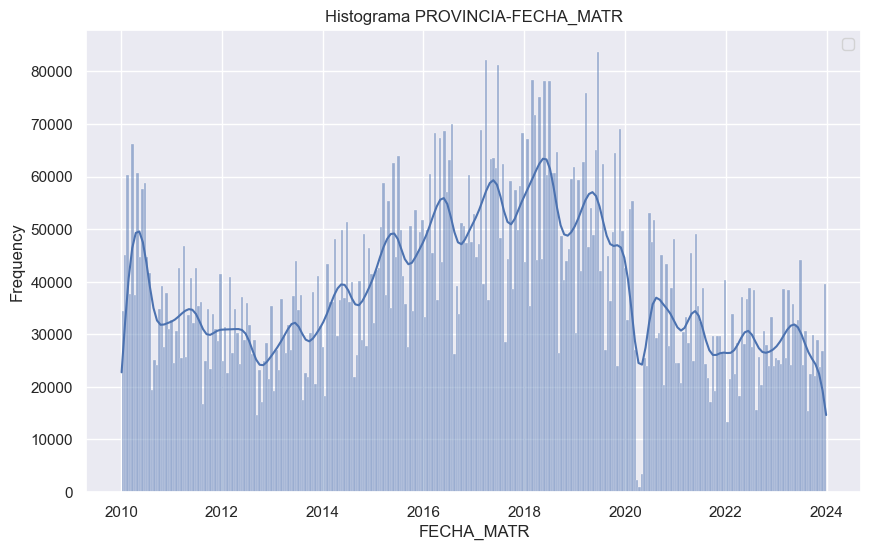

In [8]:
# Evolución de las ventas de vehiculos desde 2019
fnc.plot_categorica_numerica_histogram(get_dataframe(df, cond_list=[df.FECHA_MATR>="01-01-2010"]), "PROVINCIA", "FECHA_MATR")

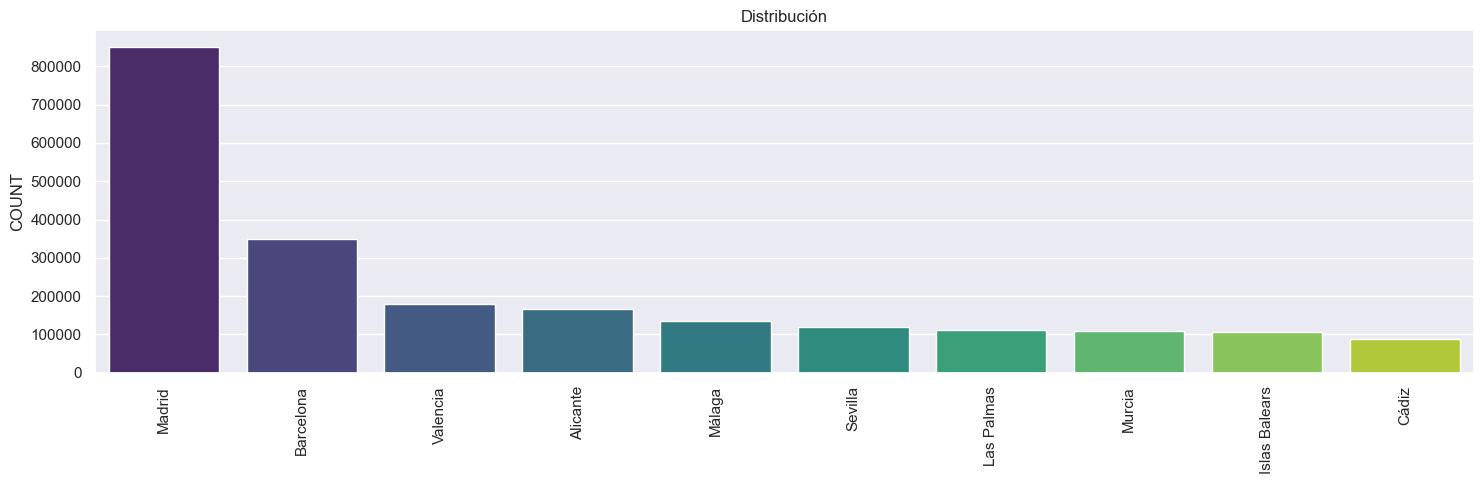

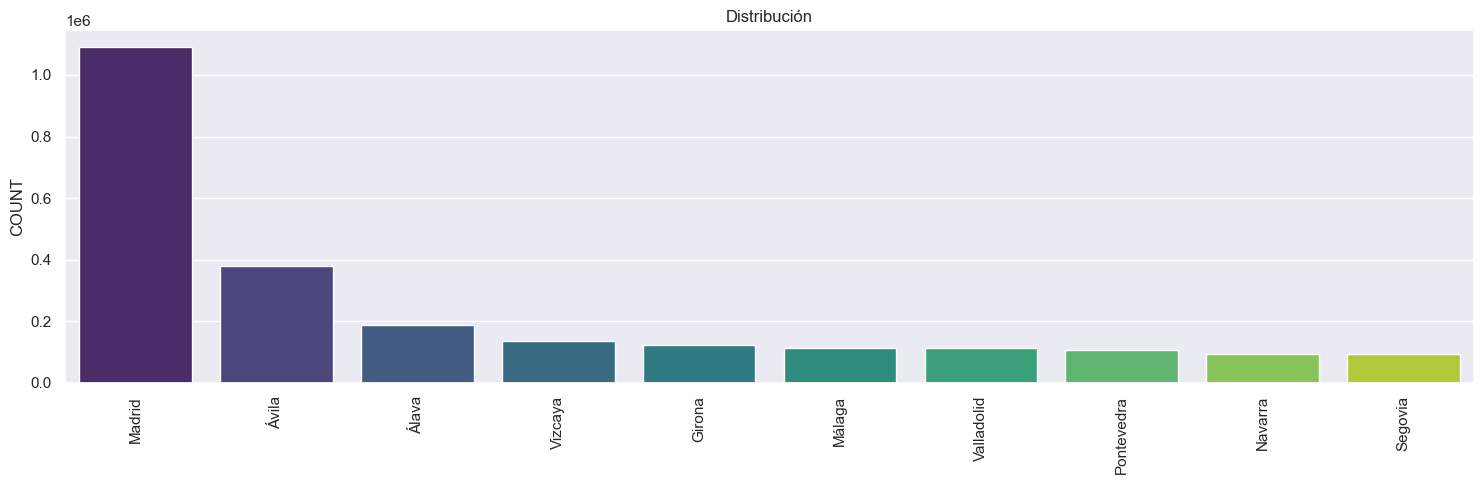

In [9]:
fnc.pinta_hist_count_categorica_numerica(get_dataframe_estudio_FECHA_MATR(df), "PROVINCIA","FECHA_MATR",10)
fnc.pinta_hist_count_categorica_numerica(get_dataframe_estudio_FECHA_MATR(df), "PROVINCIA_MATR","FECHA_MATR",10)

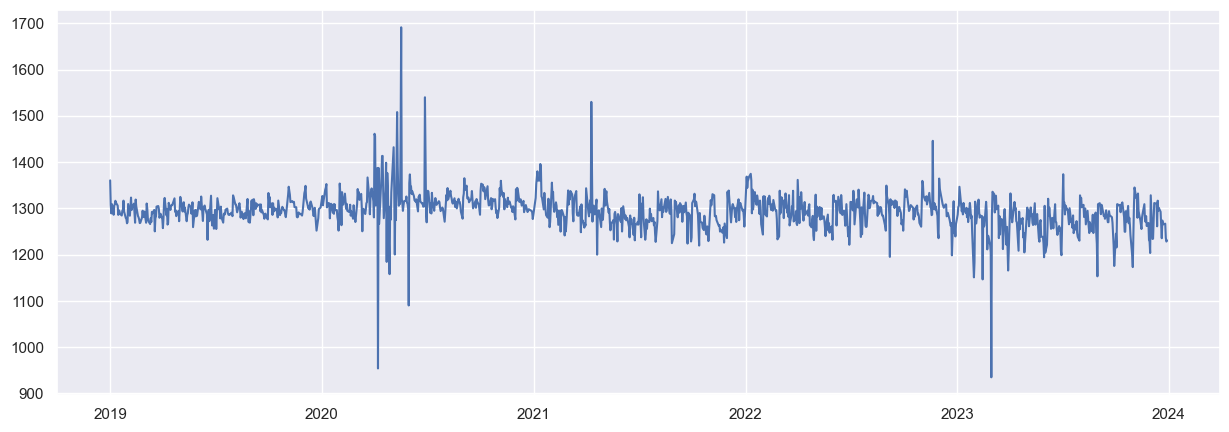

In [10]:
#df.TIPO_DGT.value_counts()
df_aux = get_dataframe_estudio_FECHA_MATR(df, [df.TARA != NUM_VALUE_SIN_DETERMINAR])
fnc.pinta_categorica_numerica_fecha(df_aux, "TIPO_DGT", "FECHA_MATR","TARA")

C:\Users\justo\AppData\Local\Temp\ipykernel_4208\818470458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["AÑO"] = df_aux["FECHA_MATR"].dt.year


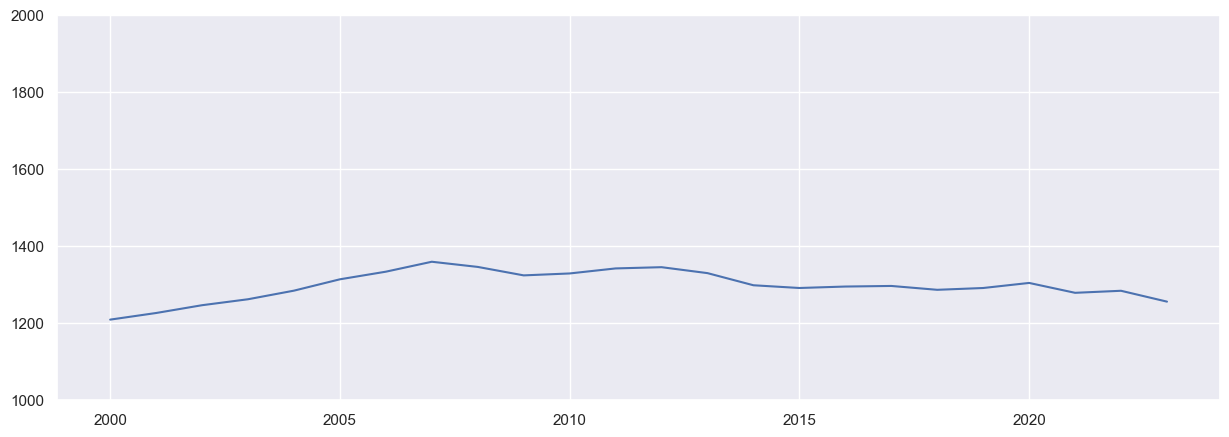

In [11]:
df_aux = df_aux = df.loc[df["FECHA_MATR"] >= "01-01-2000"] #get_dataframe_estudio_FECHA_MATR(df, [df.TARA != NUM_VALUE_SIN_DETERMINAR])
df_aux["AÑO"] = df_aux["FECHA_MATR"].dt.year

fnc.pinta_categorica_numerica_fecha(df_aux, "TIPO_DGT", "AÑO","TARA",   ylim=(1000,2000))

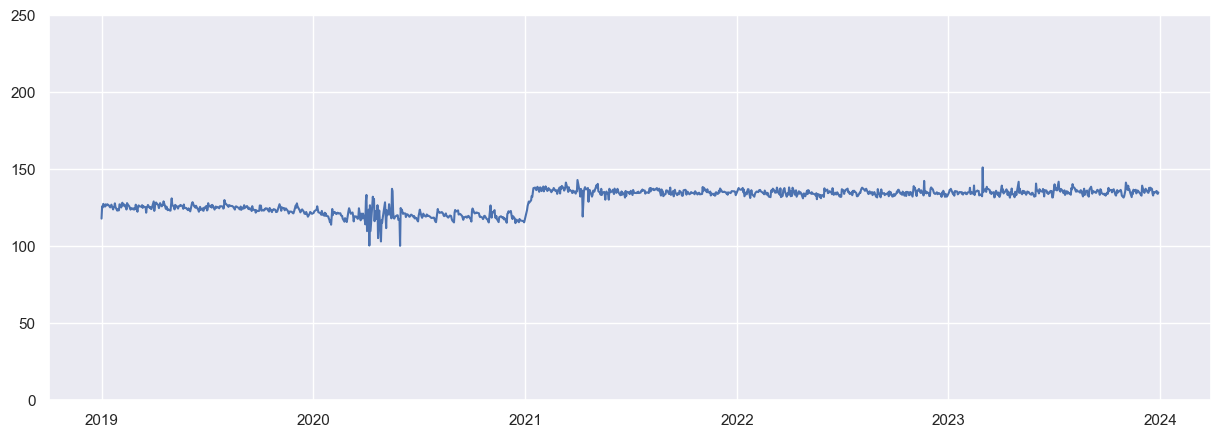

In [12]:
#df.TIPO_DGT.value_counts()
df_aux = get_dataframe_estudio_FECHA_MATR(df, [df.TARA != NUM_VALUE_SIN_DETERMINAR])
fnc.pinta_categorica_numerica_fecha(df_aux, "TIPO_DGT", "FECHA_MATR","EMISIONES_CO2", ylim=(0,250))

C:\Users\justo\AppData\Local\Temp\ipykernel_4208\1027630561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["AÑO"] = df_aux["FECHA_MATR"].dt.year


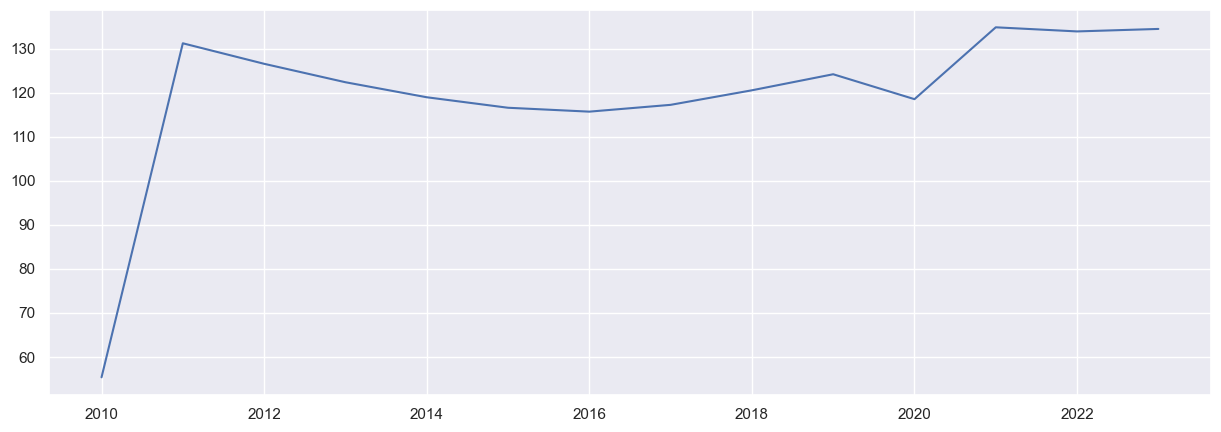

In [13]:
df_aux = df_aux = df.loc[df["FECHA_MATR"] >= "01-01-2010"] #get_dataframe_estudio_FECHA_MATR(df, [df.TARA != NUM_VALUE_SIN_DETERMINAR])
df_aux["AÑO"] = df_aux["FECHA_MATR"].dt.year

fnc.pinta_categorica_numerica_fecha(df_aux, "TIPO_DGT", "AÑO","EMISIONES_CO2")